# `blobs`
``blobs`` is a simple function to generate a test image.  It works by generating random noise, applying a guassian blur, renormalizing the result back to a uniform distribution, then thresholding the result to produce a binary image.


In [1]:
import porespy as ps
import matplotlib.pyplot as plt
import numpy as np

## `shape`
Both 2D and 3D images can be generated.  Sending a scalar (``shape=100``) will produce a 3D image of size ``100^3``.

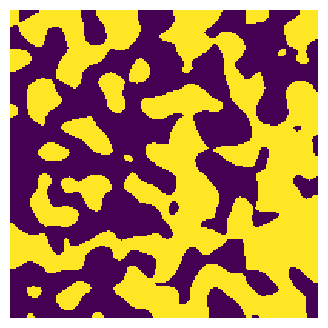

In [2]:
shape = [200, 200]
im = ps.generators.blobs(shape=shape)
fig, ax = plt.subplots(1, 1, figsize=[4, 4])
ax.imshow(im, origin='lower', interpolation='none')
ax.axis(False);

## `porosity`

The fraction of the ``True`` to ``False`` pores can be set by specifying the porosity.  The default is 0.5.

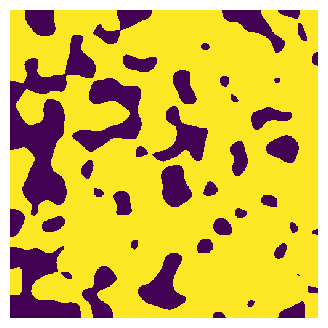

In [3]:
e = 0.75
im = ps.generators.blobs(shape=[500, 500], porosity=e)
fig, ax = plt.subplots(1, 1, figsize=[4, 4])
ax.imshow(im, origin='lower', interpolation='none')
ax.axis(False);

Specifying ``porosity=None`` will return a greyscale image which can then be thresholded to get a boolean image.  The greyscale value are adjusted to a unifrom distribution:

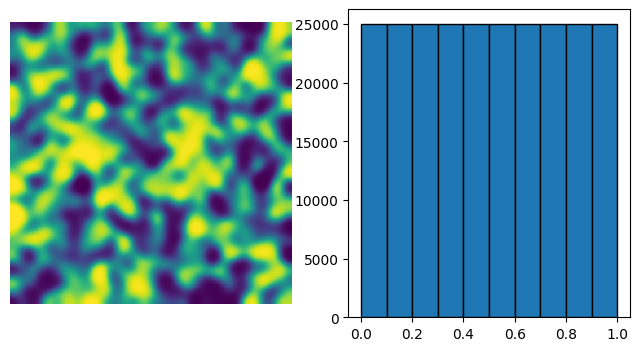

In [4]:
im = ps.generators.blobs(shape=[500, 500], porosity=None)
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

ax[0].imshow(im, origin='lower', interpolation='none')
ax[0].axis(False)

ax[1].hist(im.flatten(), edgecolor='k');

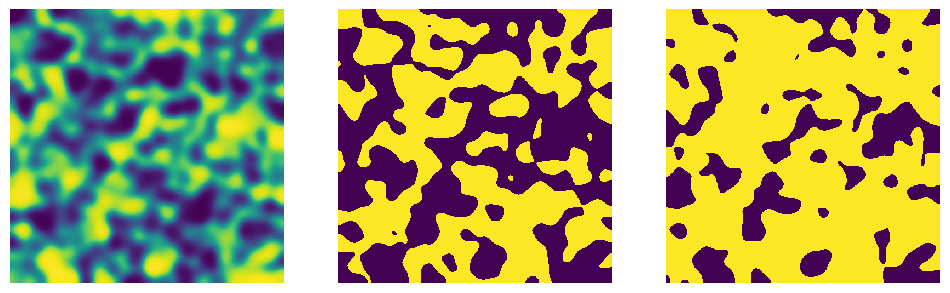

In [5]:
im = ps.generators.blobs(shape=[500, 500], porosity=None, blobiness=1)
fig, ax = plt.subplots(1, 3, figsize=[12, 4])
ax[0].imshow(im, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].imshow(im < 0.5, origin='lower', interpolation='none')
ax[1].axis(False)
ax[2].imshow(im < 0.75, origin='lower', interpolation='none')
ax[2].axis(False);

## `blobiness`
The size and anisotropy of the blobs can be changed:

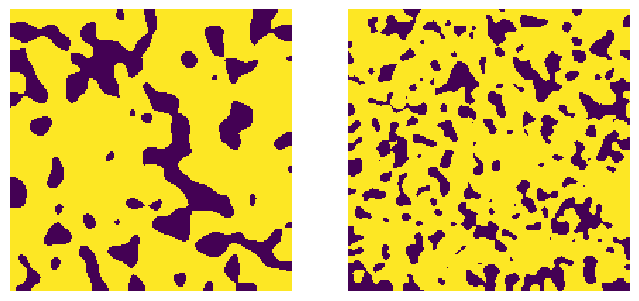

In [6]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

im1 = ps.generators.blobs(shape=shape, porosity=e, blobiness=1)
ax[0].imshow(im1, origin='lower', interpolation='none')
ax[0].axis(False)

im2 = ps.generators.blobs(shape=shape, porosity=e, blobiness=2)
ax[1].imshow(im2, origin='lower', interpolation='none')
ax[1].axis(False);


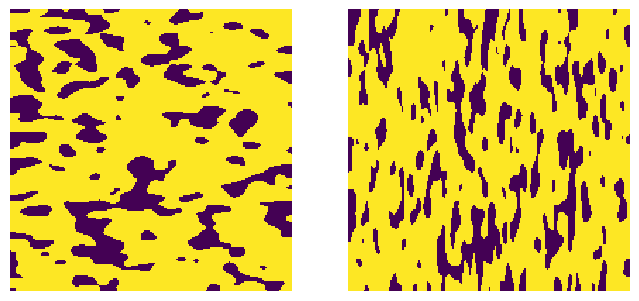

In [7]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

im1 = ps.generators.blobs(shape=shape, porosity=e, blobiness=[2, 1])
ax[0].imshow(im1, origin='lower', interpolation='none')
ax[0].axis(False)

im2 = ps.generators.blobs(shape=shape, porosity=e, blobiness=[1, 3])
ax[1].imshow(im2, origin='lower', interpolation='none')
ax[1].axis(False);

## `seed`

It is possible to get the same image by passing an integer to the `seed` argument.  This sets the numpy random number generator the specified initial state.  

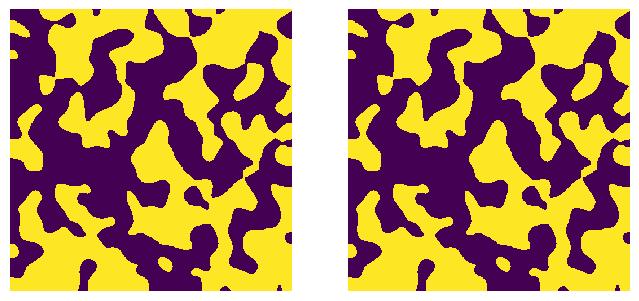

In [10]:
im1 = ps.generators.blobs(shape=[500, 500], porosity=0.5, seed=0)
im2 = ps.generators.blobs(shape=[500, 500], porosity=0.5, seed=0)
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(im1, origin='lower', interpolation='none')
ax[0].axis(False)
ax[1].imshow(im2, origin='lower', interpolation='none')
ax[1].axis(False);

## `periodic`

It is sometimes desirable to create an image with periodic boundaries such that the right edge matches the left edge.  This allows the image to be tiled while maintaining connectivity of the void space.  

(np.float64(-0.5), np.float64(999.5), np.float64(999.5), np.float64(-0.5))

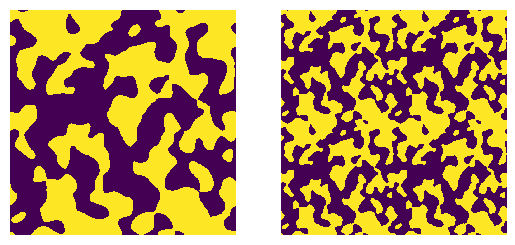

In [13]:
im = ps.generators.blobs(shape=[500, 500], porosity=0.5, seed=0, periodic=True)
im2 = np.tile(im, [2, 2])

fig, ax = plt.subplots(1, 2)
ax[0].imshow(im, interpolation='none')
ax[0].axis(False)
ax[1].imshow(im2, interpolation='none')
ax[1].axis(False)
